In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1787,2020-09-28,United Kingdom,434399.0,434969.0,42027.0,41988.0,-570.0,39.0
1788,2020-09-28,Germany,286307.0,285332.0,9470.0,9460.0,975.0,10.0
1789,2020-09-28,Iran,446209.0,446448.0,25610.0,25589.0,-239.0,21.0
1790,2020-09-28,Turkey,314273.0,314433.0,7989.0,7997.0,-160.0,-8.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11202.318080357143
RMSE =  40416.788367318


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  318.40625
RMSE =  798.2562441033581


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  82245.8224852071
RMSE =  127806.72283421284
-- World performances for deaths --
MAE =  1904.378698224852
RMSE =  2310.0970854876855


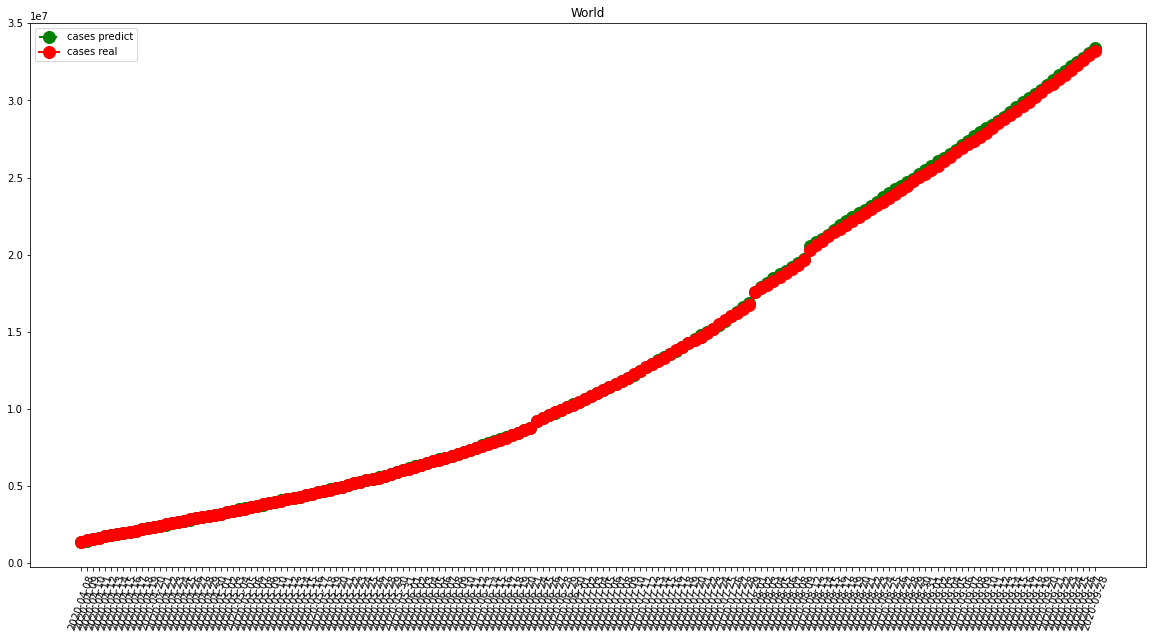

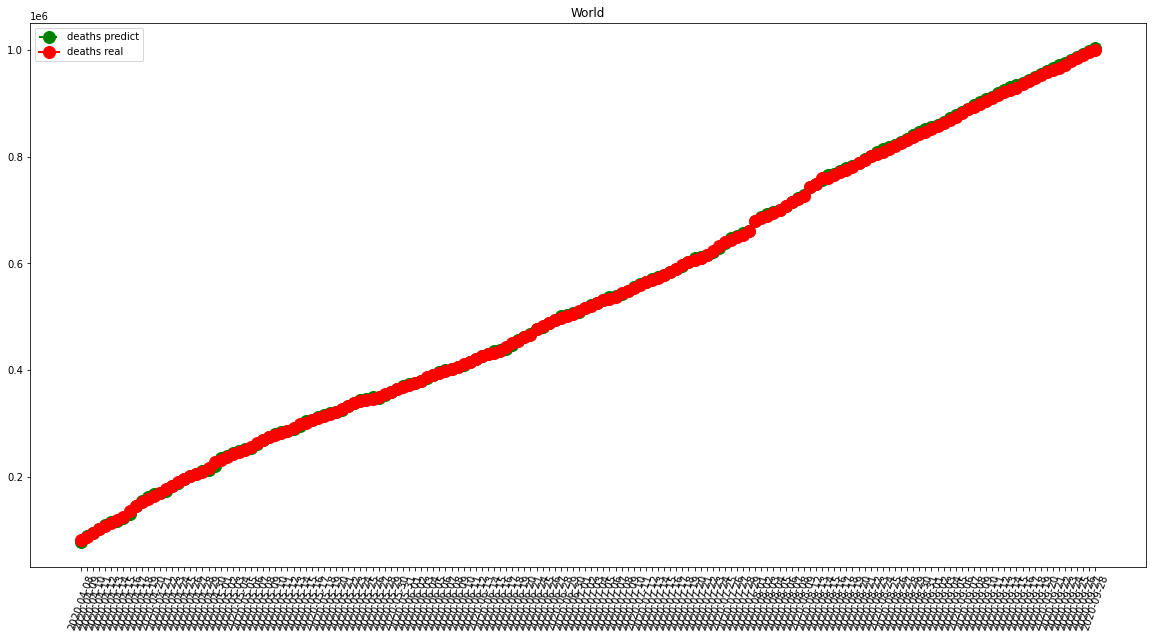

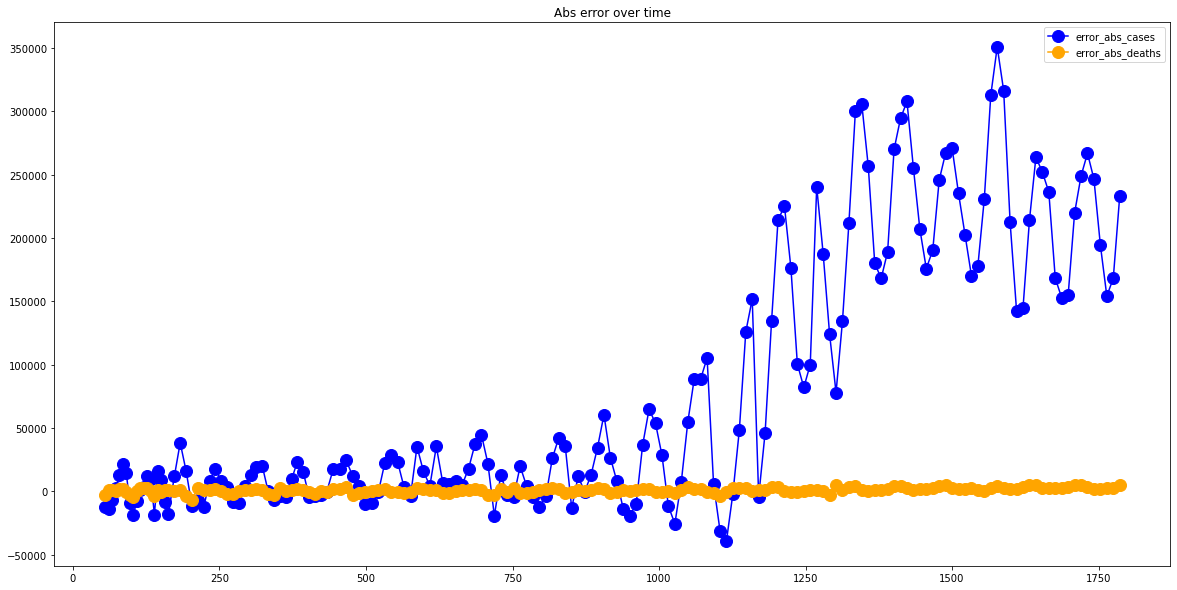

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1282.4022346368715
RMSE =  1969.682908433877
-- France performances for deaths --
MAE =  109.42458100558659
RMSE =  251.42260046055202


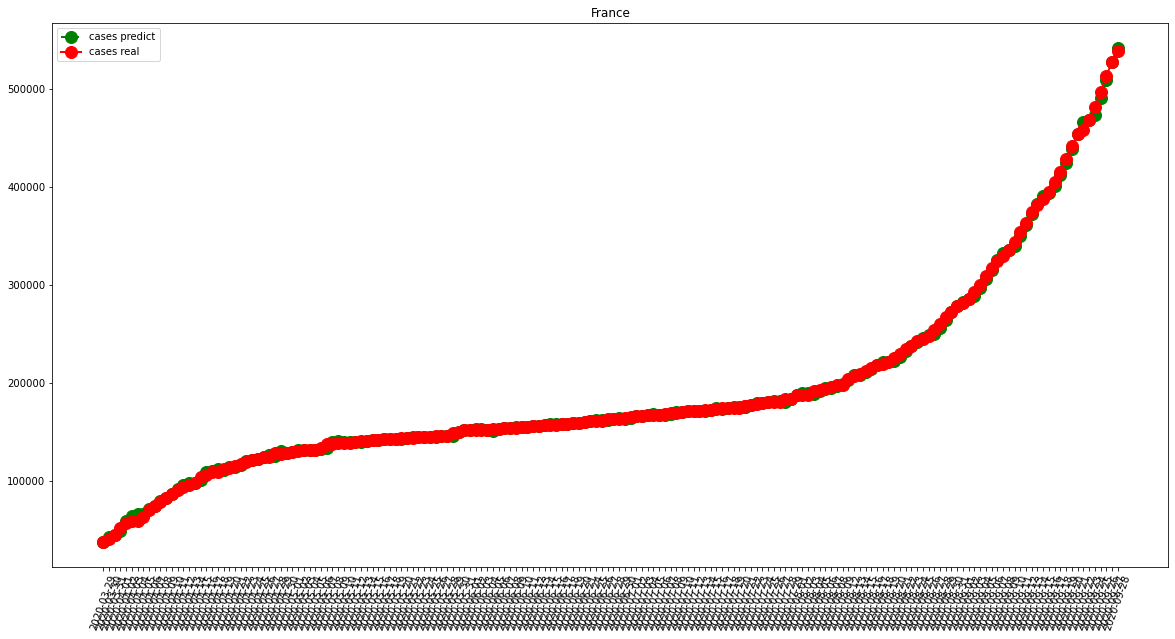

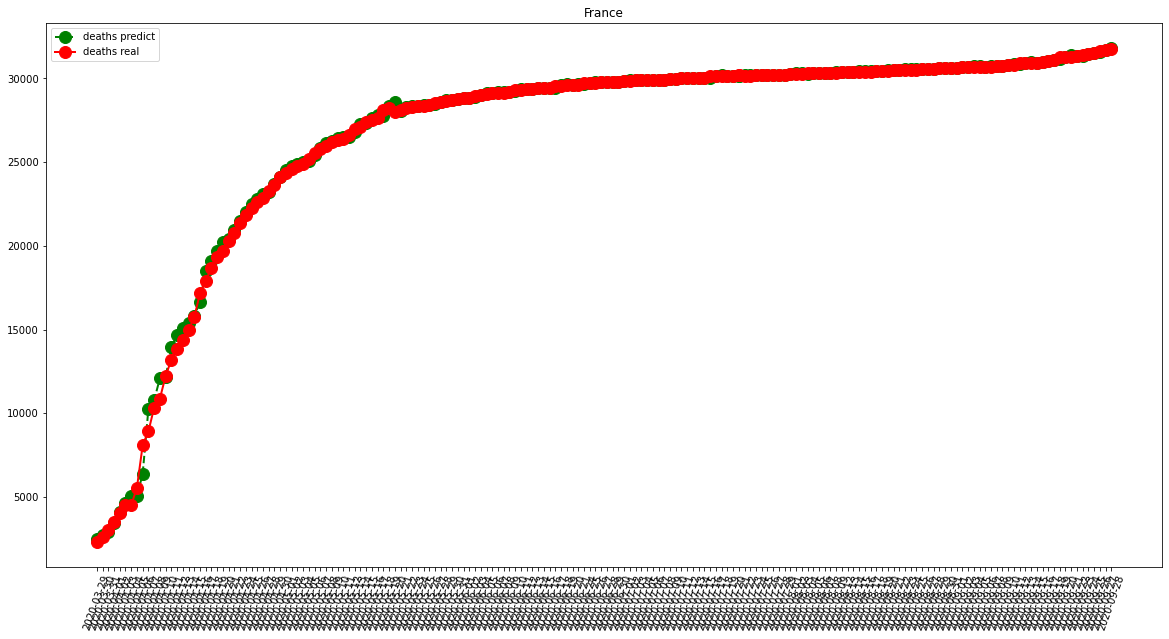

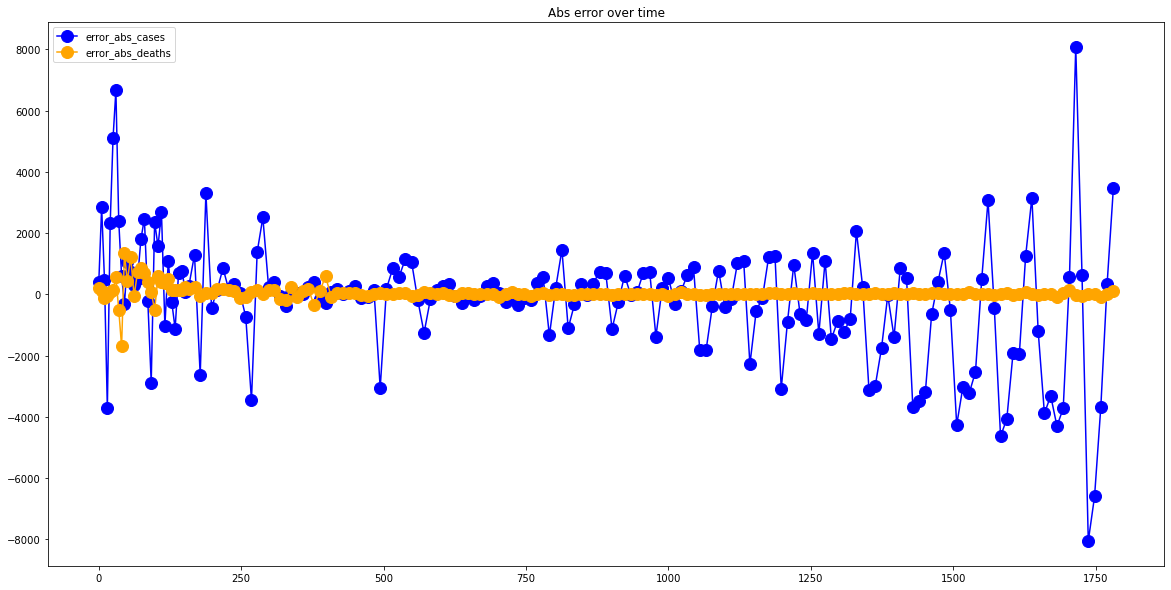

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.4581005586592
RMSE =  443.73781830789227
-- Italy performances for deaths --
MAE =  64.6927374301676
RMSE =  221.9724176332369


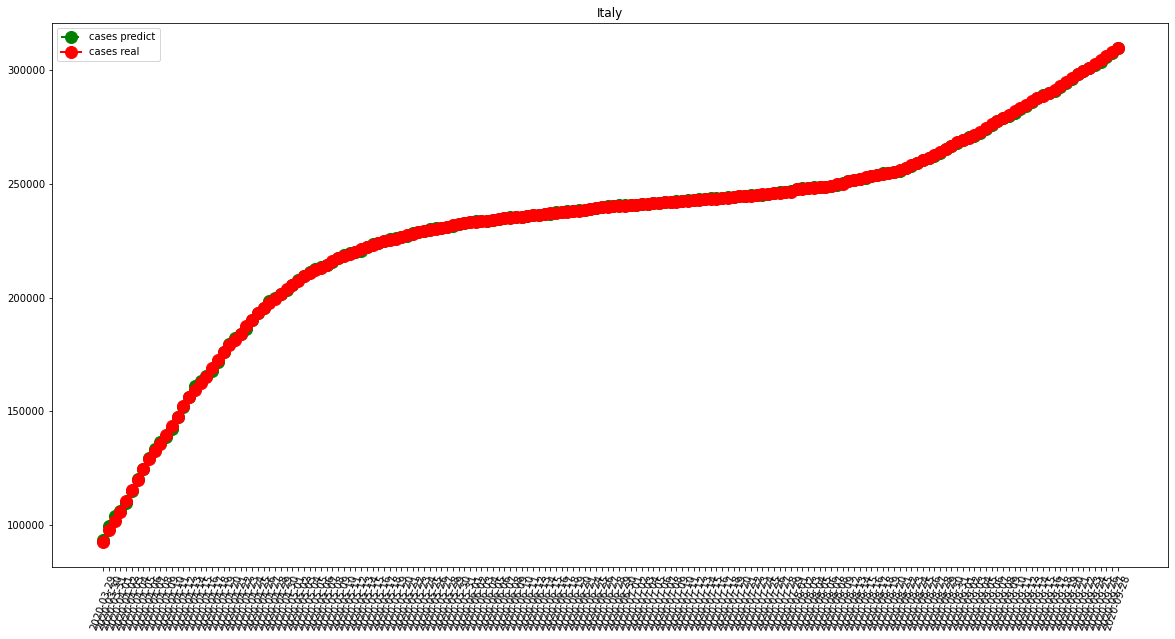

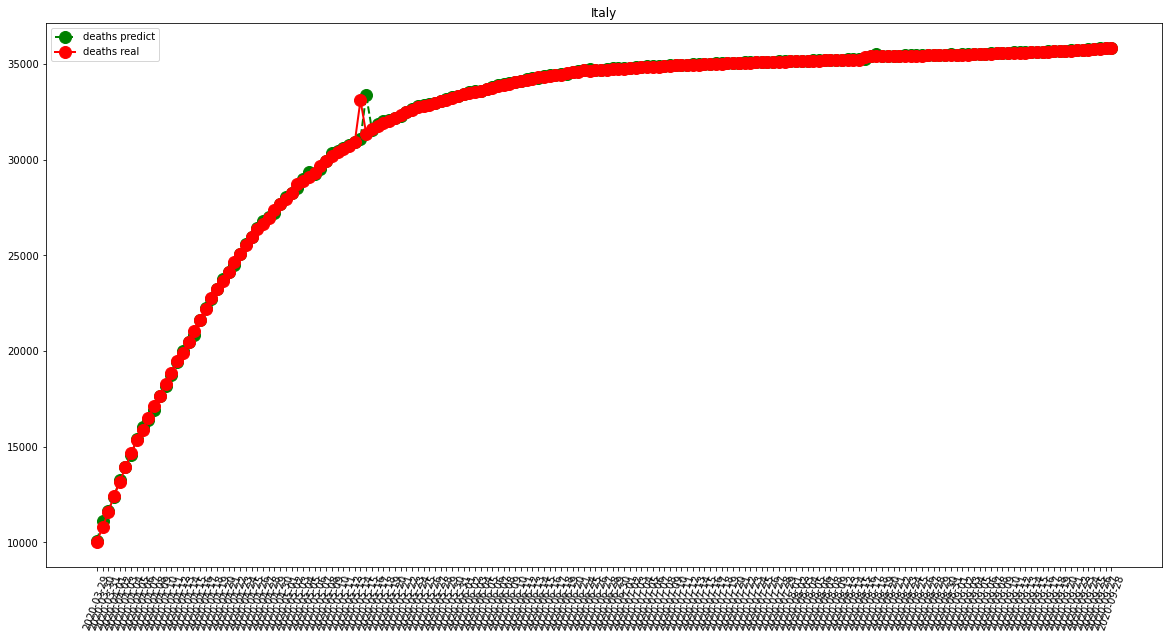

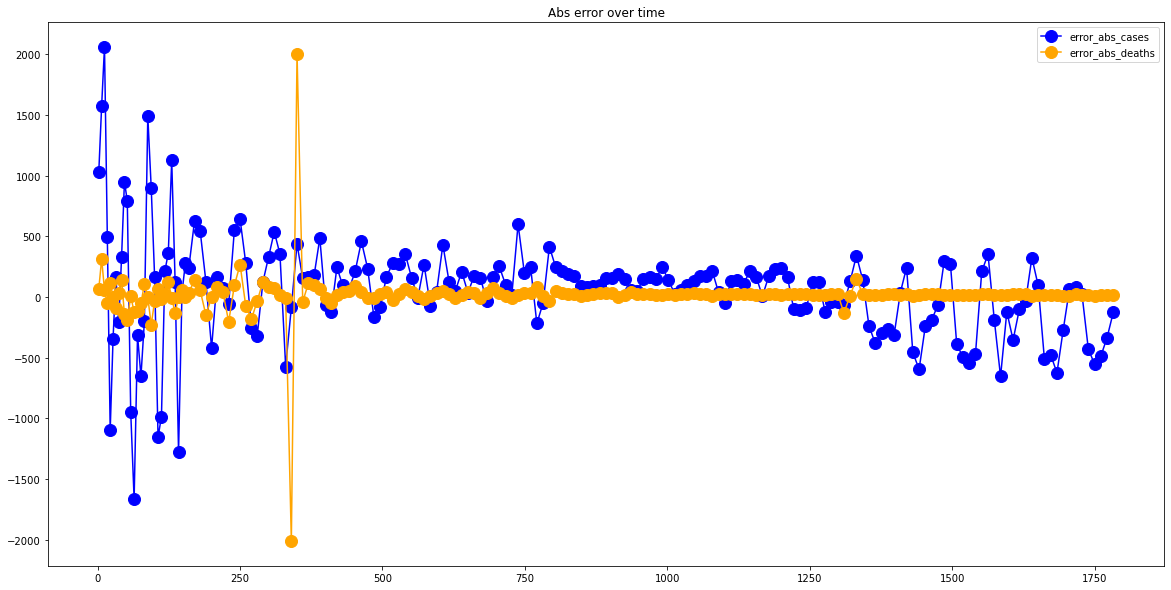

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2768.9441340782123
RMSE =  5338.341942806213
-- Spain performances for deaths --
MAE =  119.3072625698324
RMSE =  306.05020218418946


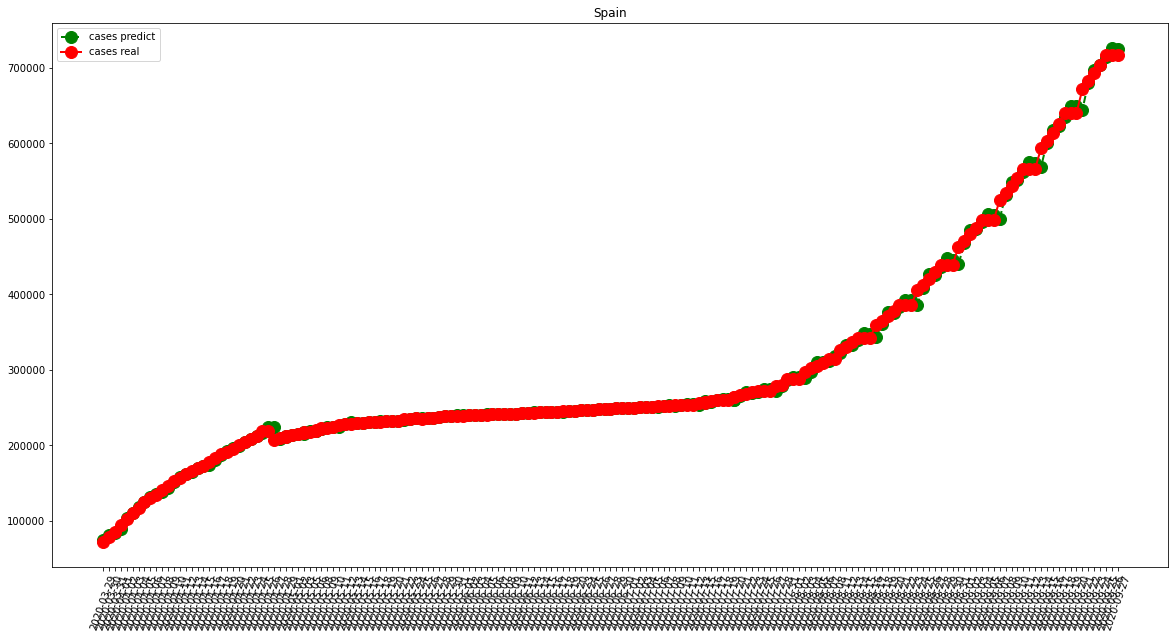

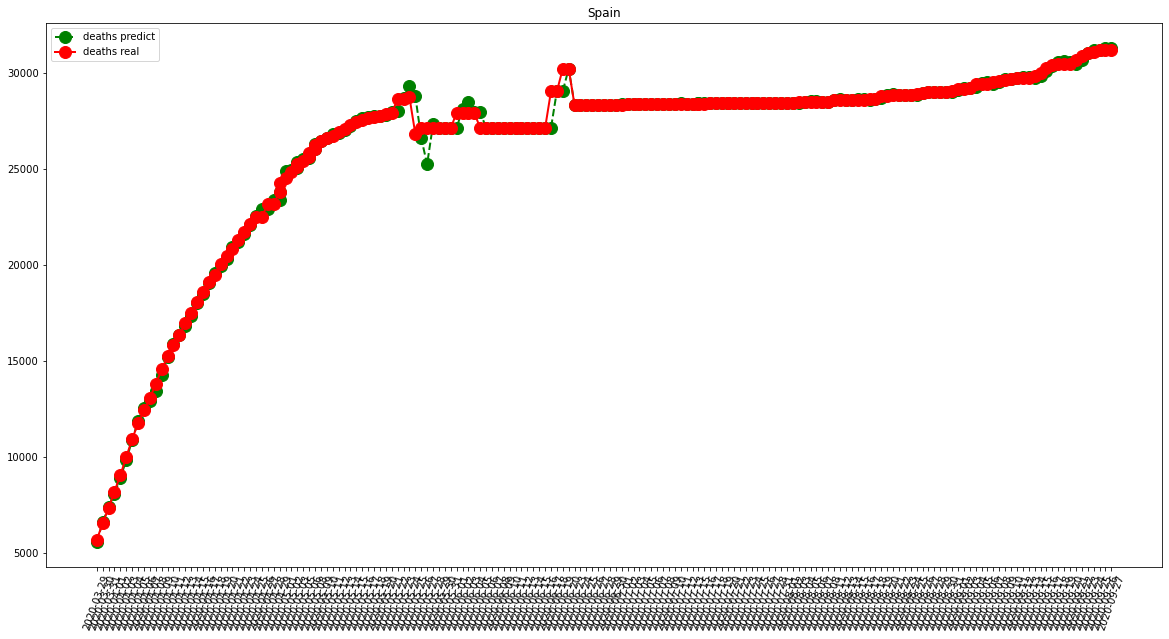

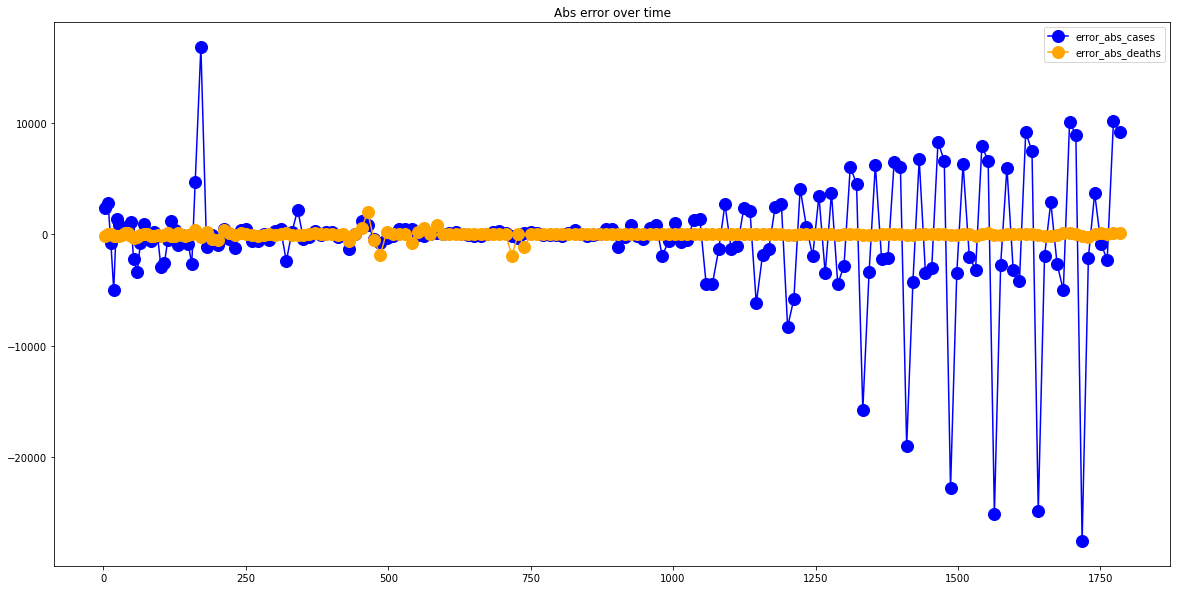

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16079.90502793296
RMSE =  23383.0946529215
-- United States performances for deaths --
MAE =  479.6927374301676
RMSE =  668.9060234116782


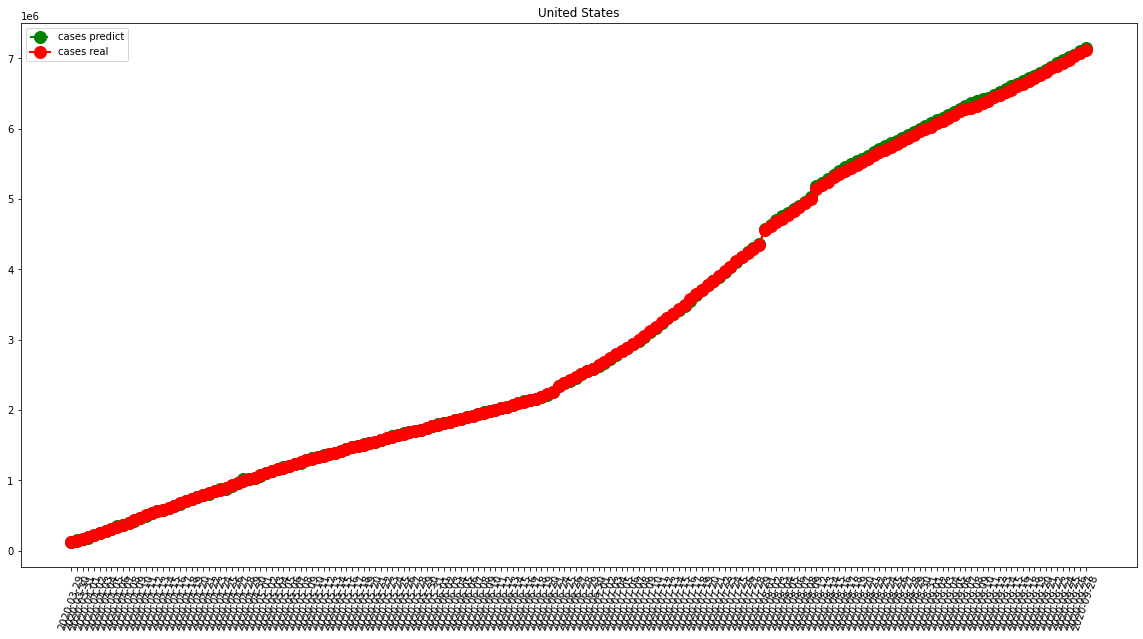

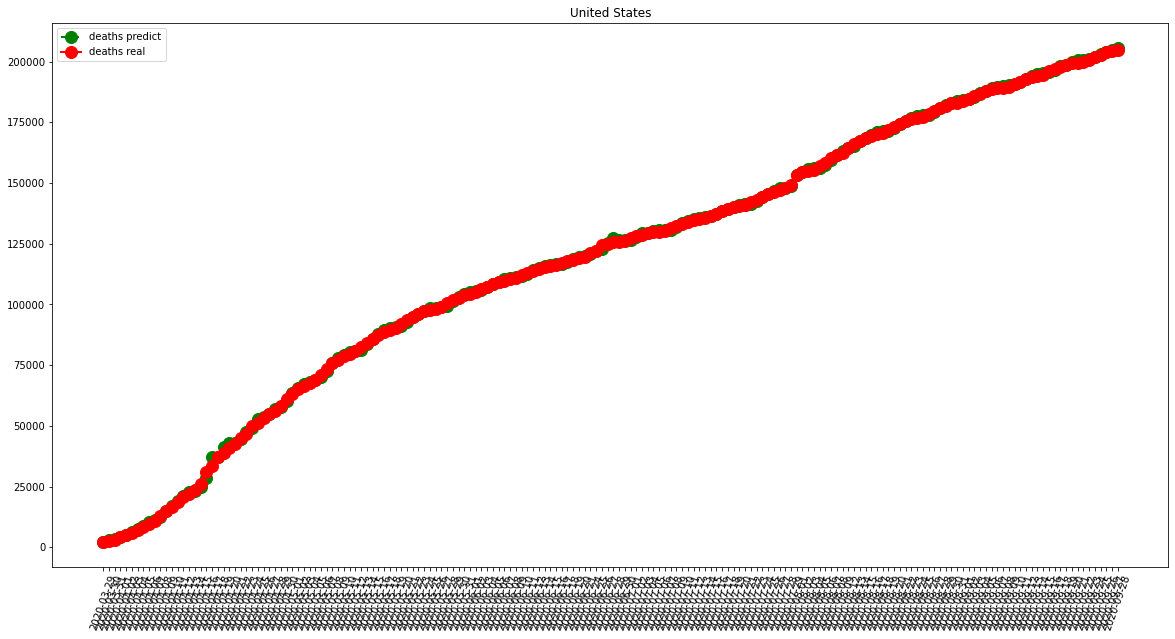

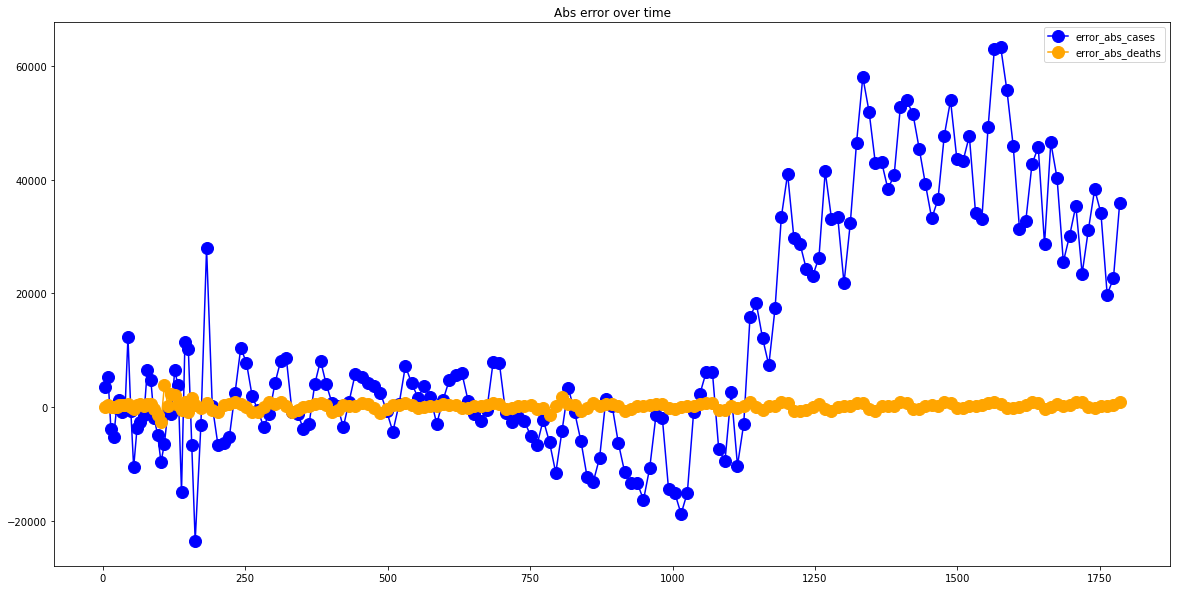

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  57.212290502793294
RMSE =  89.27689022637169
-- China performances for deaths --
MAE =  24.01675977653631
RMSE =  117.38074894744746


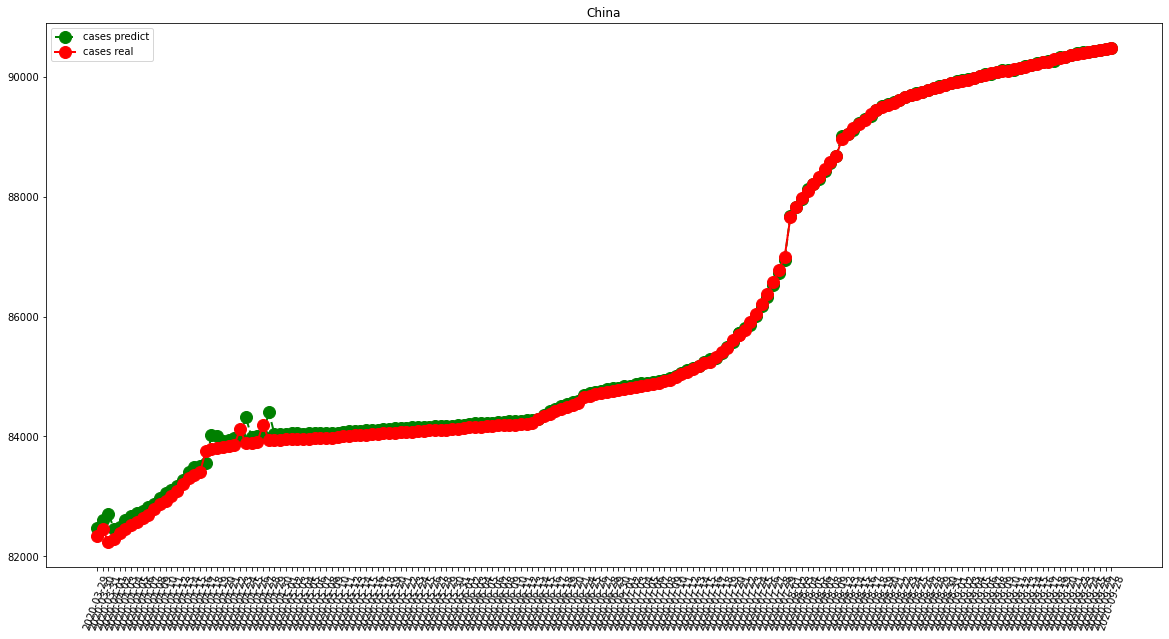

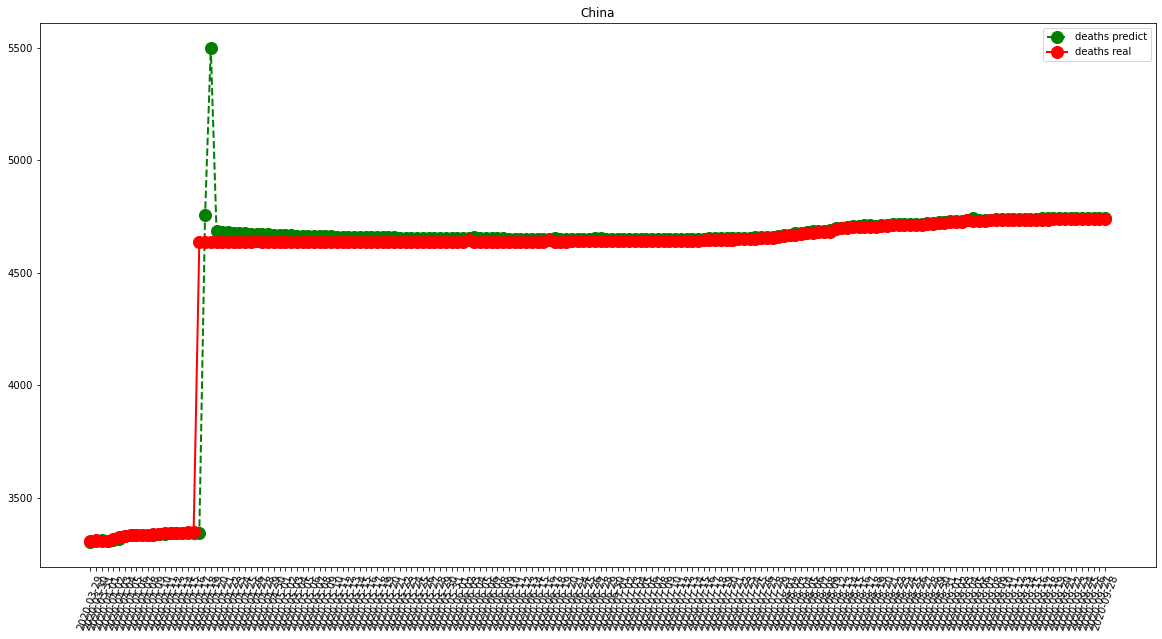

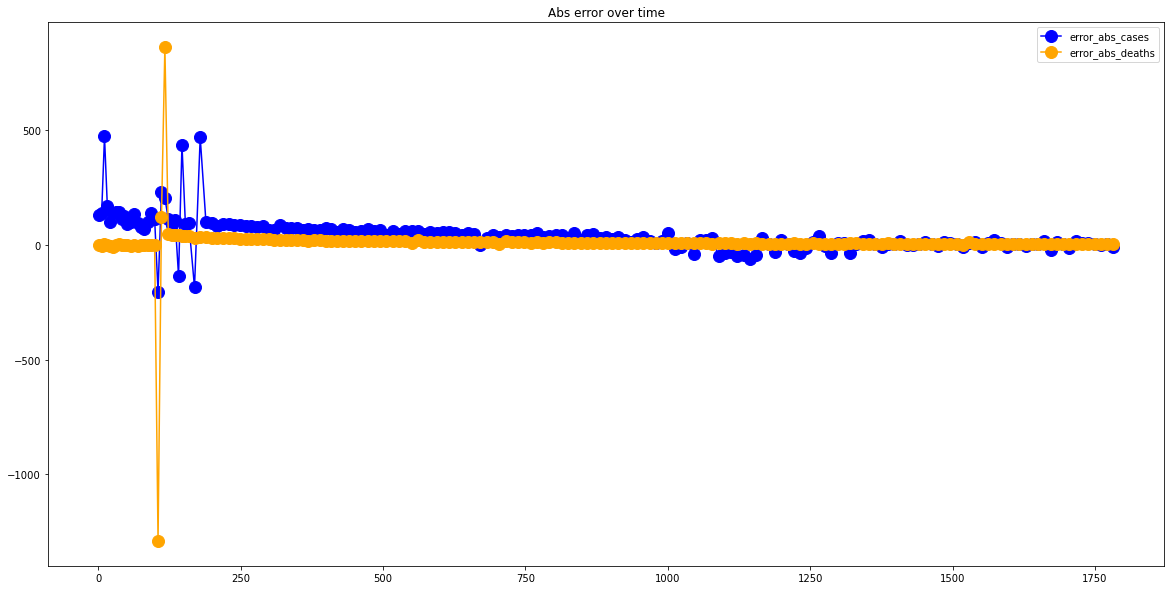

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1063.0198675496688
RMSE =  3451.7496820525193
-- United Kingdom performances for deaths --
MAE =  205.21192052980132
RMSE =  694.6117930515992


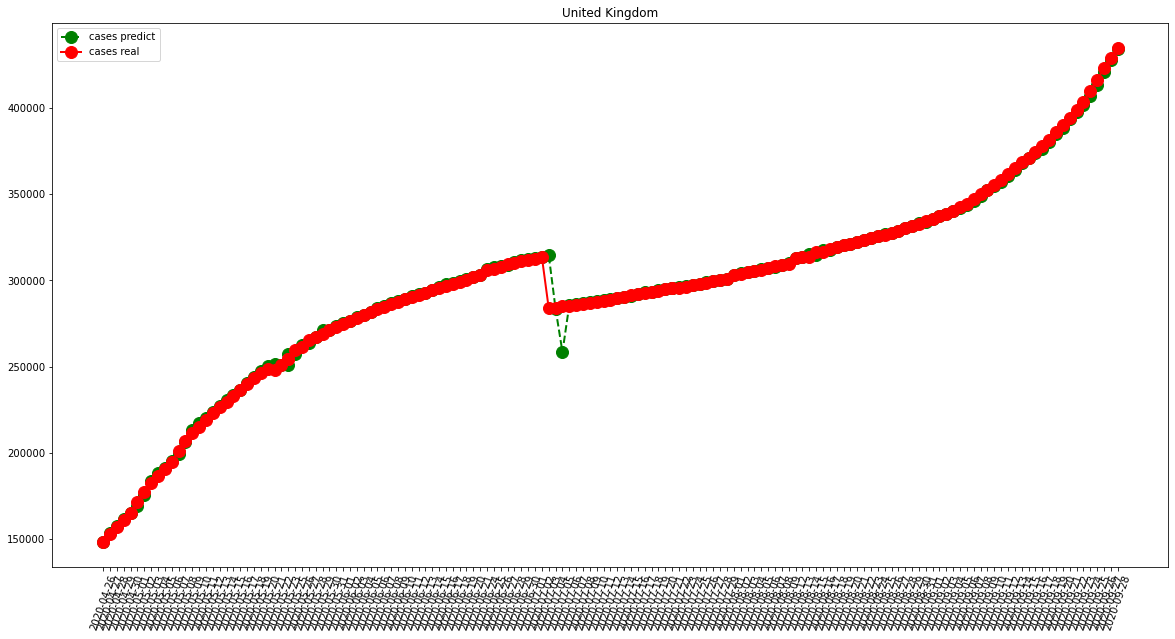

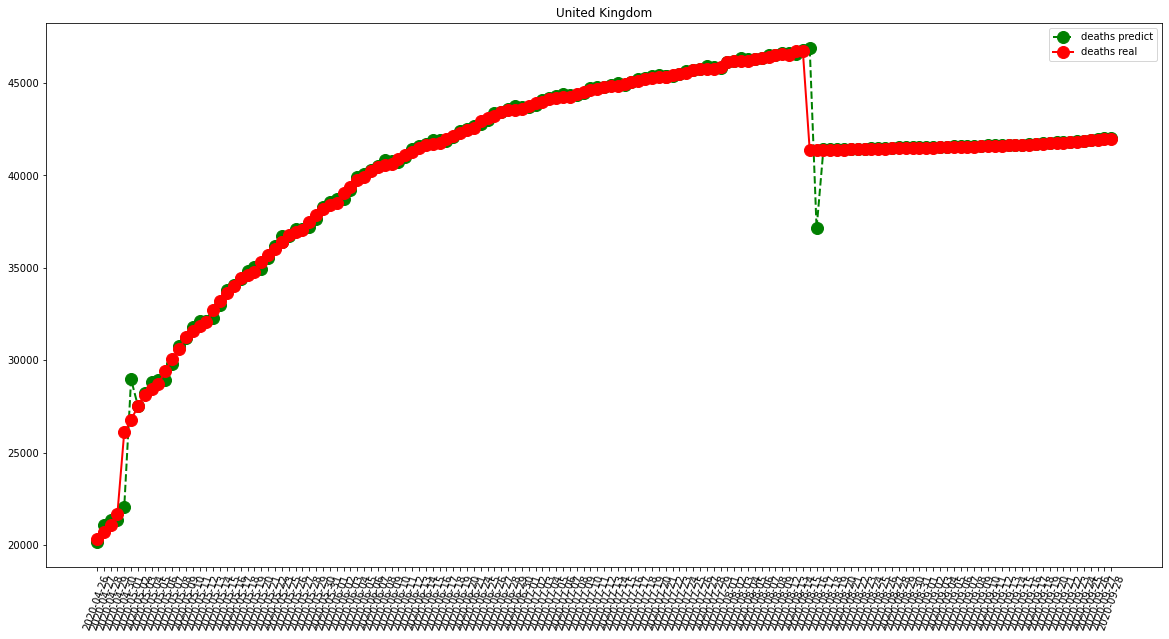

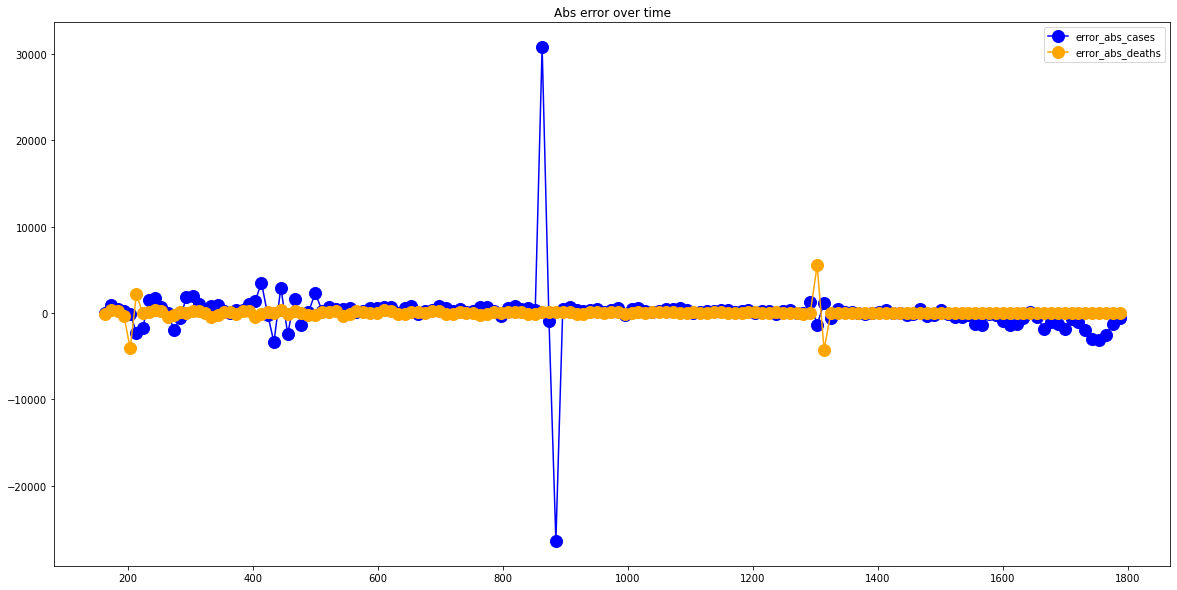

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  428.4834437086093
RMSE =  591.8743658080339
-- Germany performances for deaths --
MAE =  18.423841059602648
RMSE =  35.911775633336106


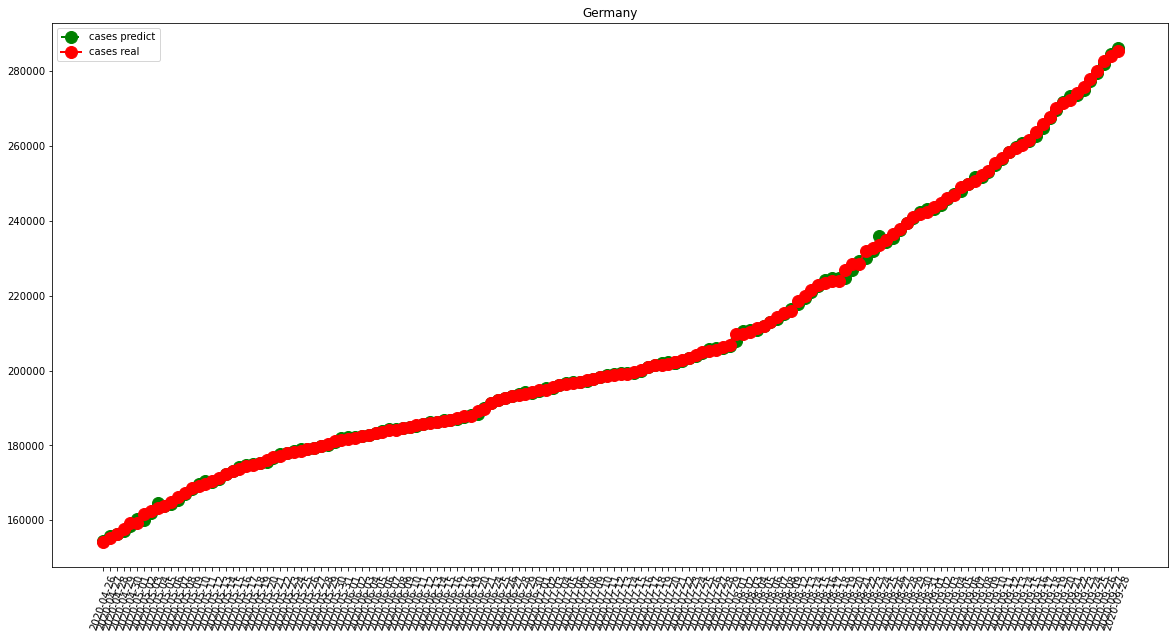

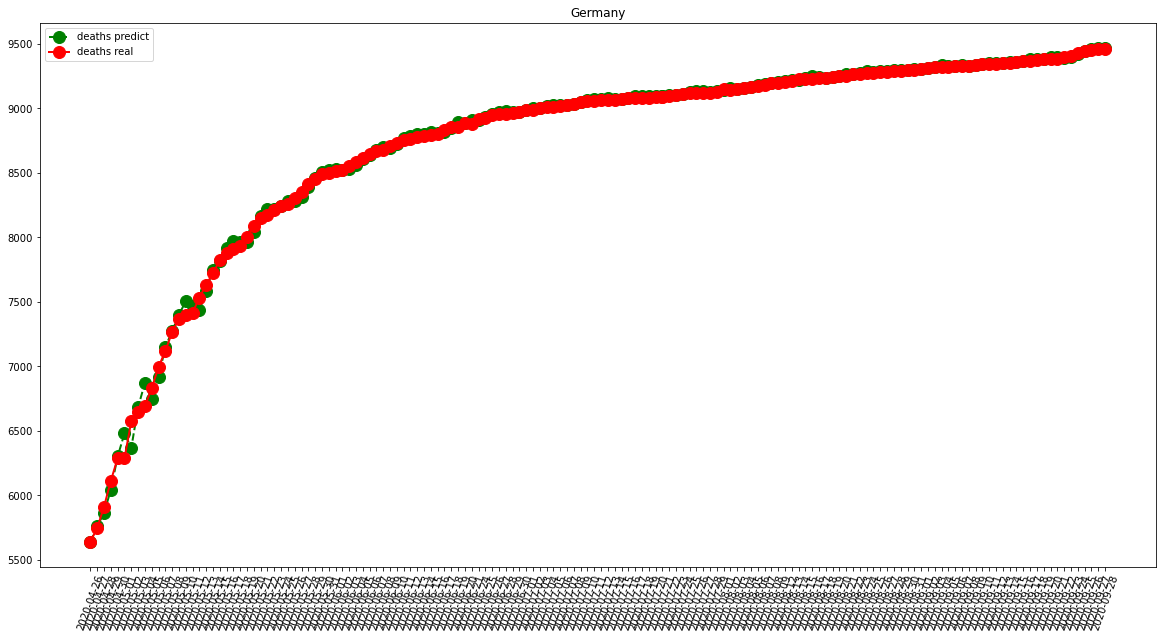

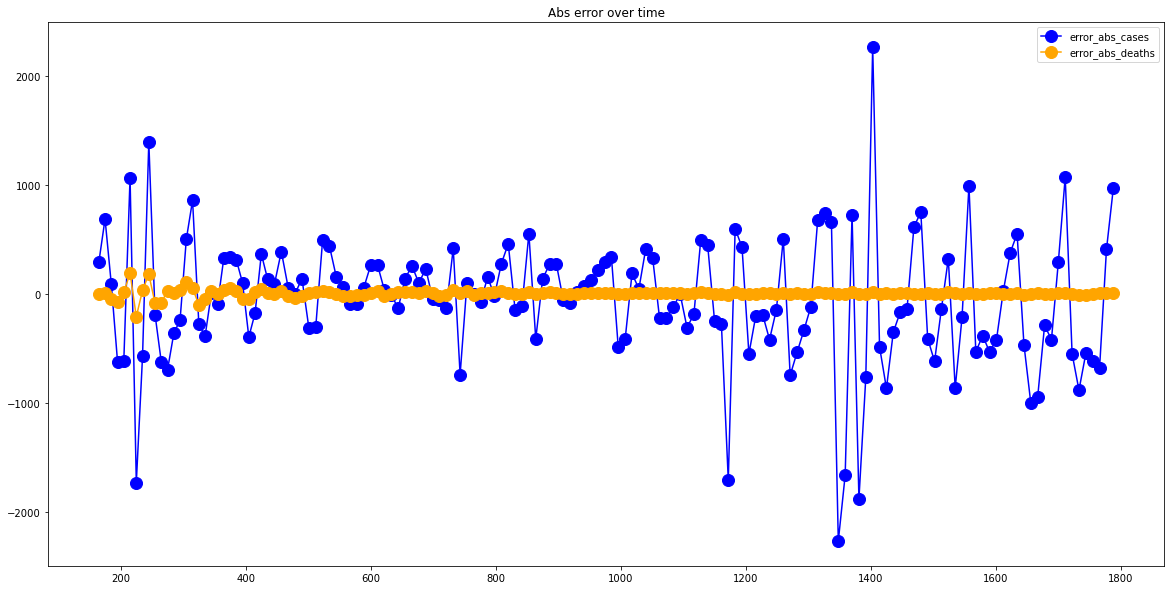

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  859.2980132450331
RMSE =  1208.7681595641734
-- Iran performances for deaths --
MAE =  50.682119205298015
RMSE =  83.58764286504973


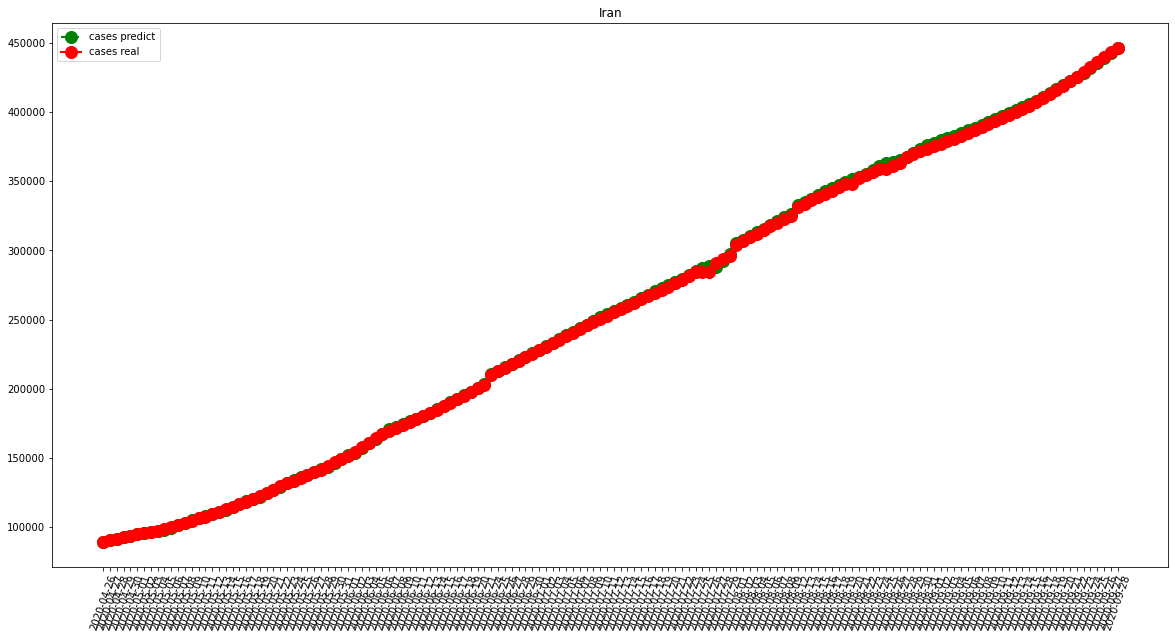

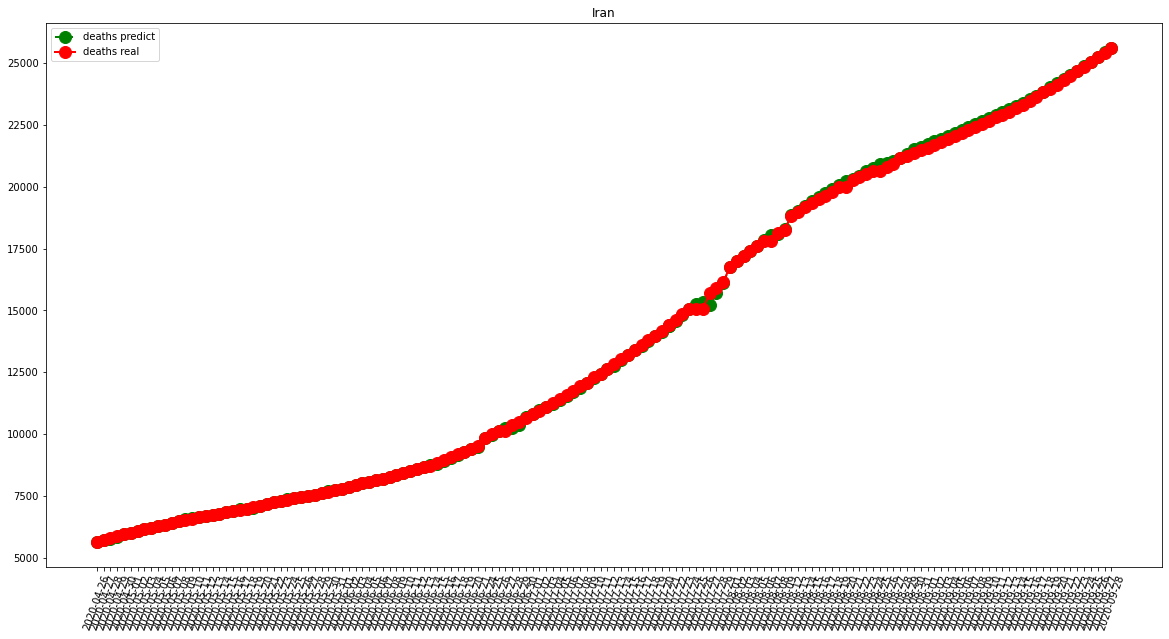

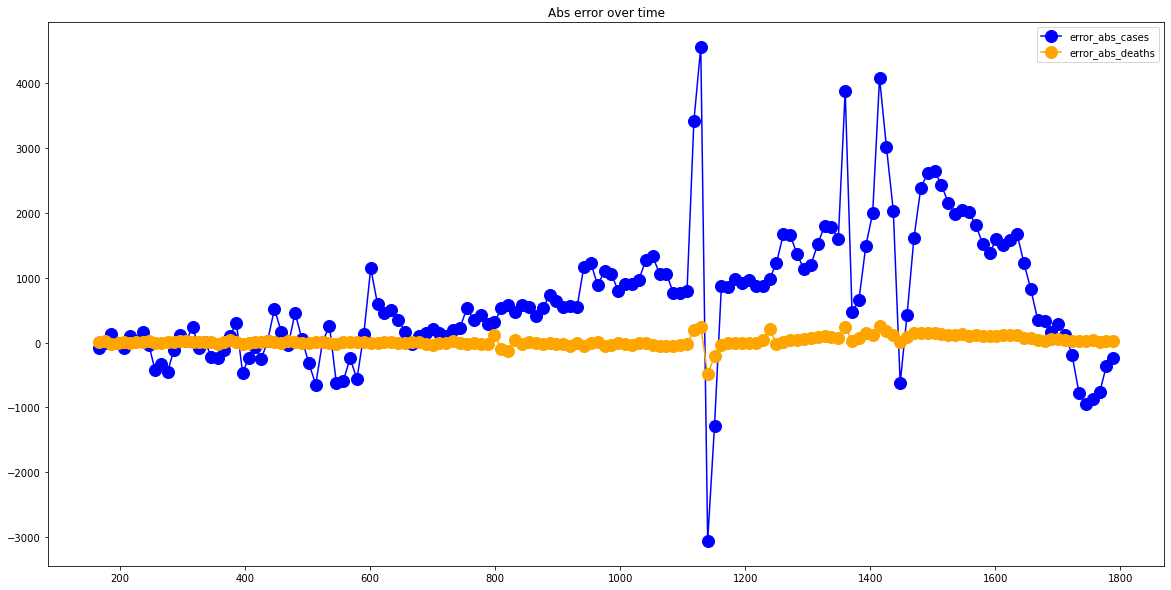

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.48344370860926
RMSE =  331.94983862661906
-- Turkey performances for deaths --
MAE =  15.827814569536423
RMSE =  82.88170777345088


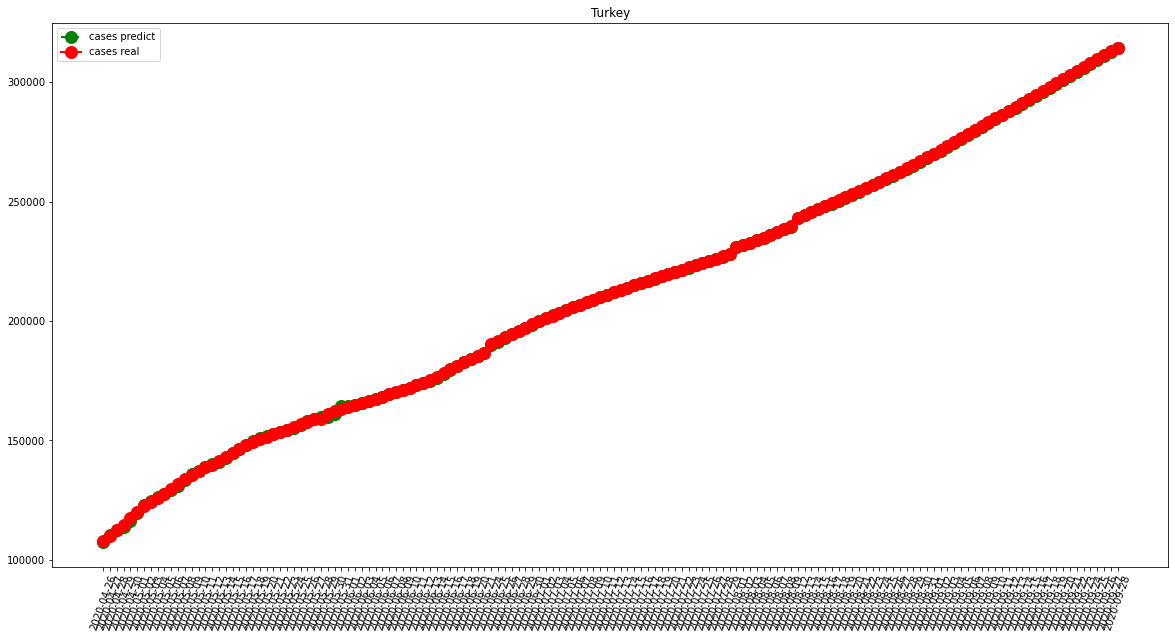

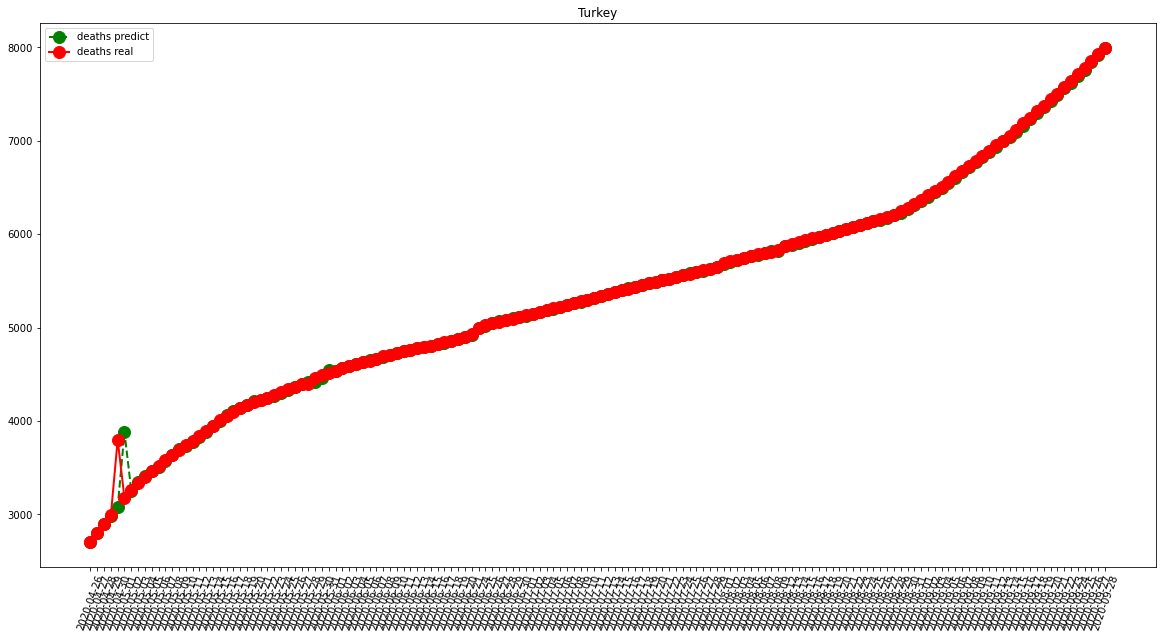

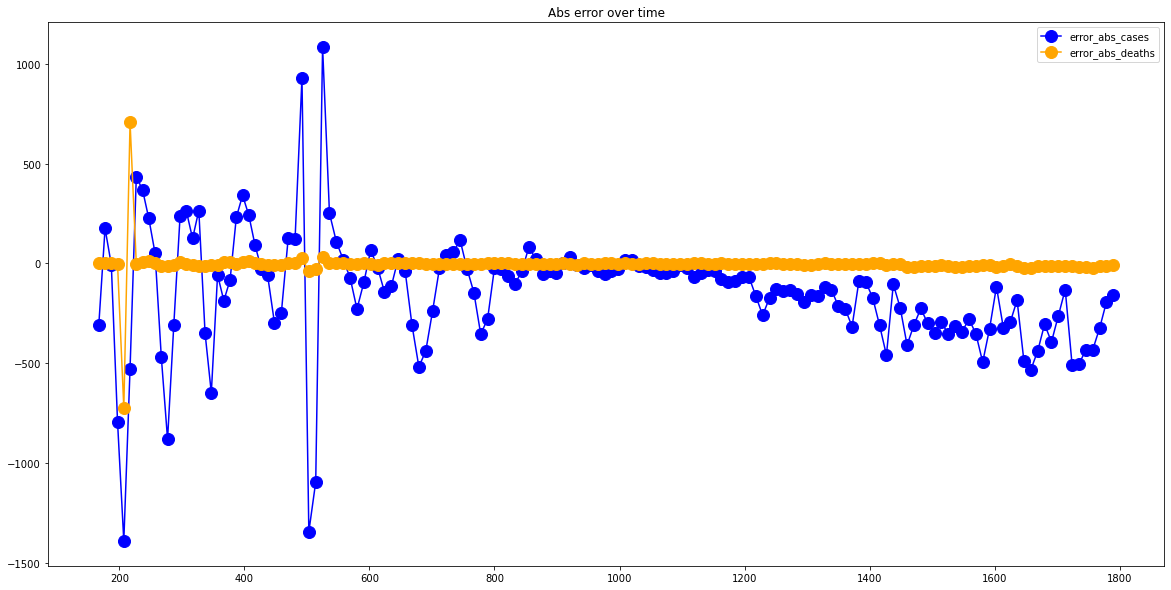

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17077.475806451614
RMSE =  22166.61833794958
-- Brazil performances for deaths --
MAE =  501.9758064516129
RMSE =  605.1413124754549


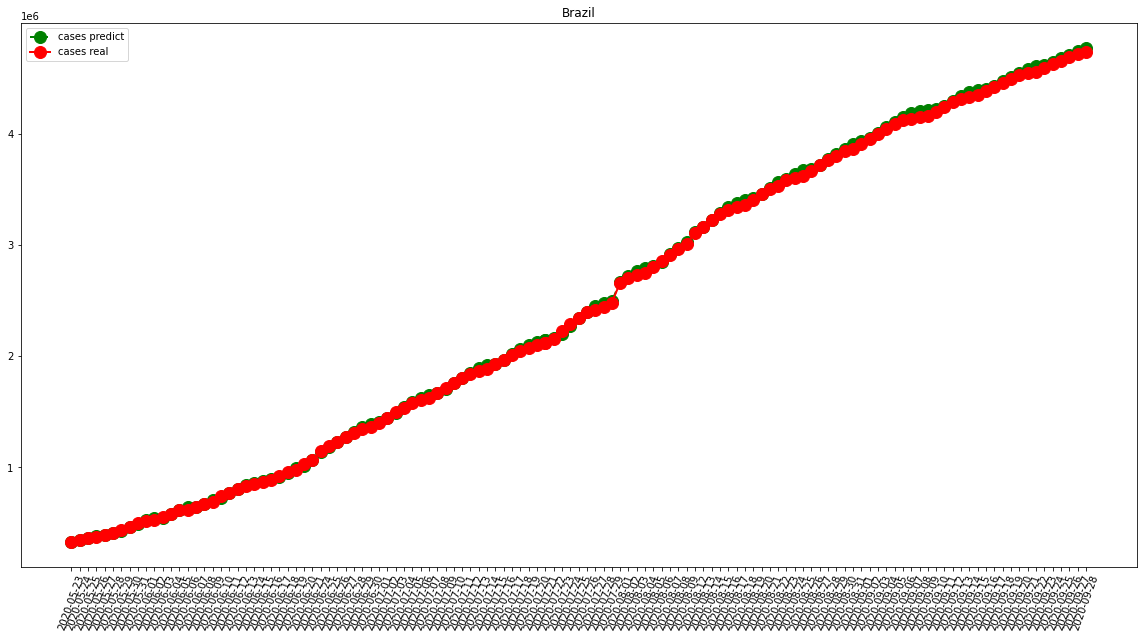

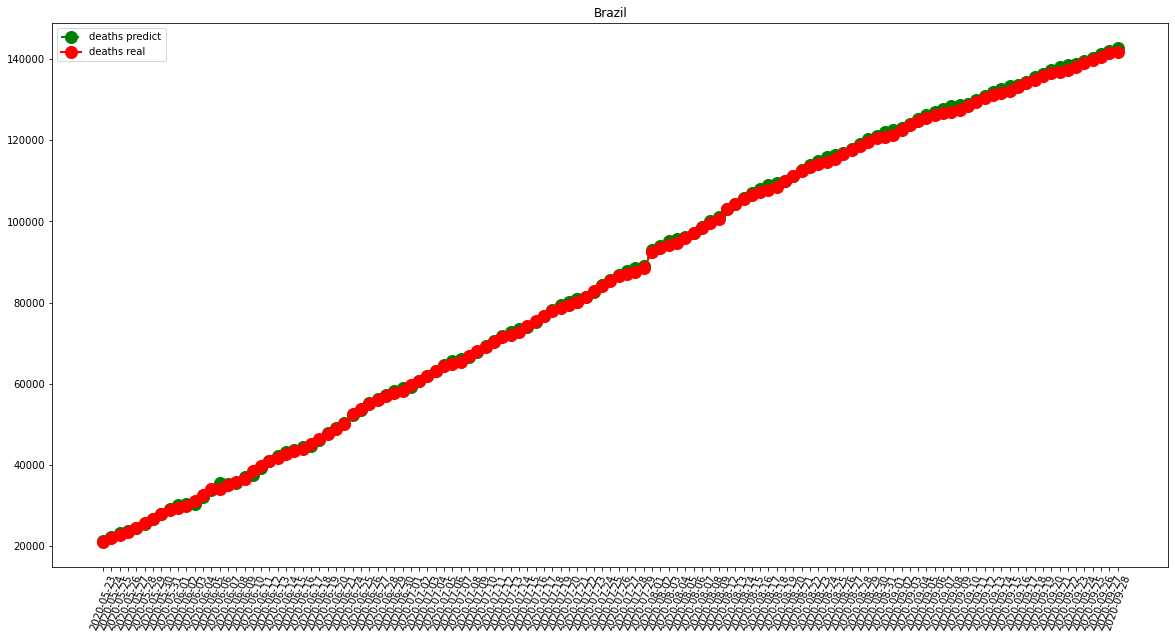

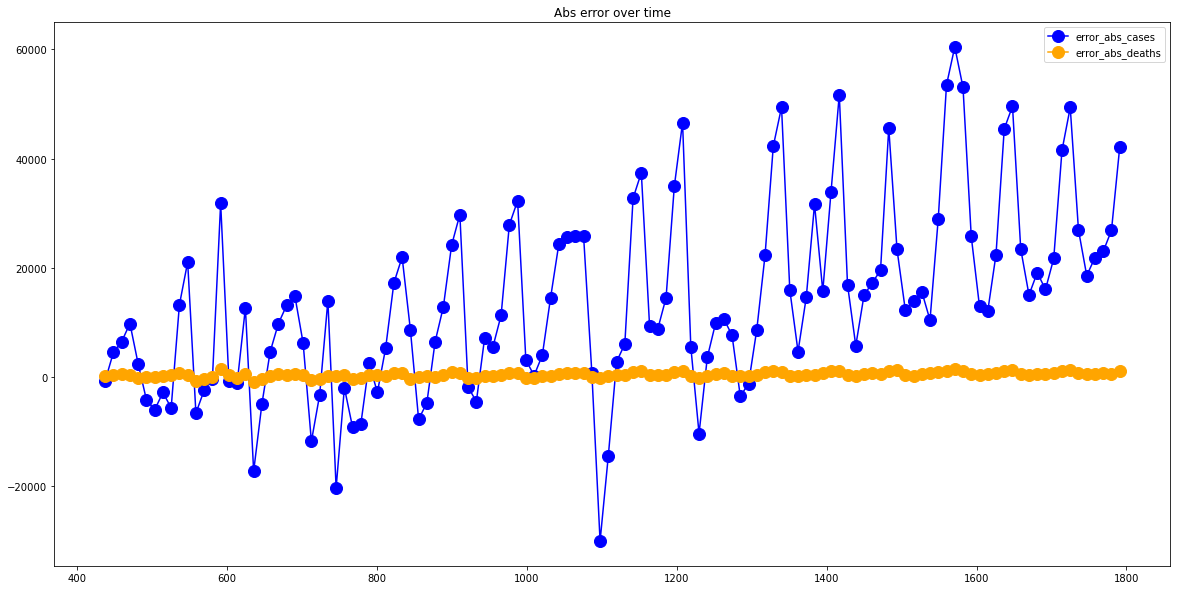

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)